In [1]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pwd

'/Users/mmesinovic/Desktop/AMI/DynaGraph'

In [3]:
train = np.load('attention_scores_train.npy')

In [4]:
train.shape

(6, 80, 80)

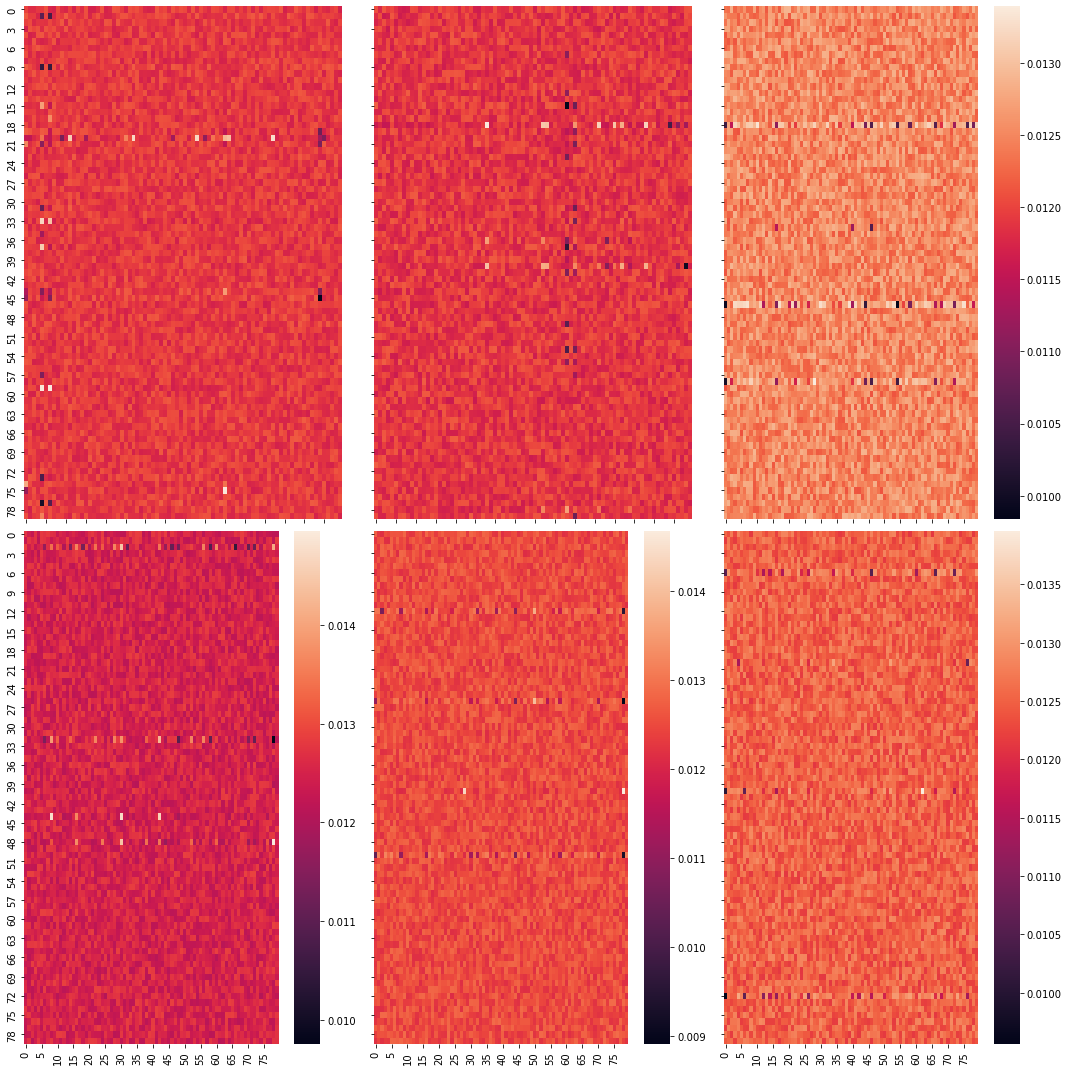

In [5]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(15, 15))
sns.heatmap(train[0, :, :], ax=axes[0, 0], cbar=False)
sns.heatmap(train[1, :, :], ax=axes[0, 1], cbar=False)
sns.heatmap(train[2, :, :], ax=axes[0, 2])
sns.heatmap(train[3, :, :], ax=axes[1, 0])
sns.heatmap(train[4, :, :], ax=axes[1, 1])
sns.heatmap(train[5, :, :], ax=axes[1, 2])
fig.tight_layout()
plt.savefig('Explainability_Train.png', dpi=600)

In [45]:
features = ['predictedhospitalmortality', 'gender',
       'age', 'admissionheight', 'admissionweight', 'hour', 'teachingstatus',
       'ethnicity_African American', 'ethnicity_Asian', 'ethnicity_Caucasian',
       'ethnicity_Hispanic', 'ethnicity_Native American',
       'ethnicity_Other/Unknown', 'unittype_CCU-CTICU', 'unittype_CSICU',
       'unittype_CTICU', 'unittype_Cardiac ICU', 'unittype_MICU',
       'unittype_Med-Surg ICU', 'unittype_Neuro ICU', 'unittype_SICU',
       'unitadmitsource_Acute Care/Floor', 'unitadmitsource_Direct Admit',
       'unitadmitsource_Emergency Department', 'unitadmitsource_Floor',
       'unitadmitsource_Operating Room', 'unitadmitsource_Other Hospital',
       'unitadmitsource_PACU', 'unitadmitsource_Recovery Room',
       'unitadmitsource_Step-Down Unit (SDU)', 'unitadmitsource_misc',
       'unitvisitnumber_1', 'unitvisitnumber_2', 'unitvisitnumber_3',
       'unitvisitnumber_misc', 'unitstaytype_admit', 'unitstaytype_readmit',
       'unitstaytype_transfer', 'physicianspeciality_Specialty Not Specified',
       'physicianspeciality_cardiology',
       'physicianspeciality_critical care medicine (CCM)',
       'physicianspeciality_family practice',
       'physicianspeciality_hospitalist',
       'physicianspeciality_internal medicine', 'physicianspeciality_misc',
       'physicianspeciality_neurology', 'physicianspeciality_other',
       'physicianspeciality_pulmonary', 'physicianspeciality_pulmonary/CCM',
       'physicianspeciality_surgery-cardiac',
       'physicianspeciality_surgery-general',
       'physicianspeciality_surgery-neuro',
       'physicianspeciality_surgery-trauma',
       'physicianspeciality_surgery-vascular', 'physicianspeciality_unknown',
       'numbedscategory_100 - 249', 'numbedscategory_250 - 499',
       'numbedscategory_<100', 'numbedscategory_>= 500', 'region_Midwest',
       'region_Northeast', 'region_South', 'region_West', 'BUN', 'Hct', 'Hgb',
       'MCHC', 'MCV', 'RBC', 'WBC x 1000', 'calcium', 'chloride', 'creatinine',
       'glucose', 'platelets x 1000', 'potassium', 'sodium',
       'noninvasivesystolic', 'noninvasivediastolic', 'noninvasivemean']

In [46]:
len(features)

80

In [47]:
labels = ['death', 'PAD', 'HF', 'ARR', 'AF']

In [48]:
features = list(set(features).difference(labels))

In [49]:
features[18]

'BUN'

In [50]:
summary1 = np.sum(train, axis=1)

In [51]:
summary1.shape
summary1 = summary1 / summary1.max(axis=0)

In [52]:
summary2 = np.sum(train, axis=2)

In [53]:
summary2.shape
summary2 = (summary2 - summary2.min(0)) / summary2.ptp(0)

C:\Users\mmesinovic\AppData\Local\Temp\ipykernel_23992\3161255101.py:2: RuntimeWarning: invalid value encountered in divide
  summary2 = (summary2 - summary2.min(0)) / summary2.ptp(0)


<Axes: >

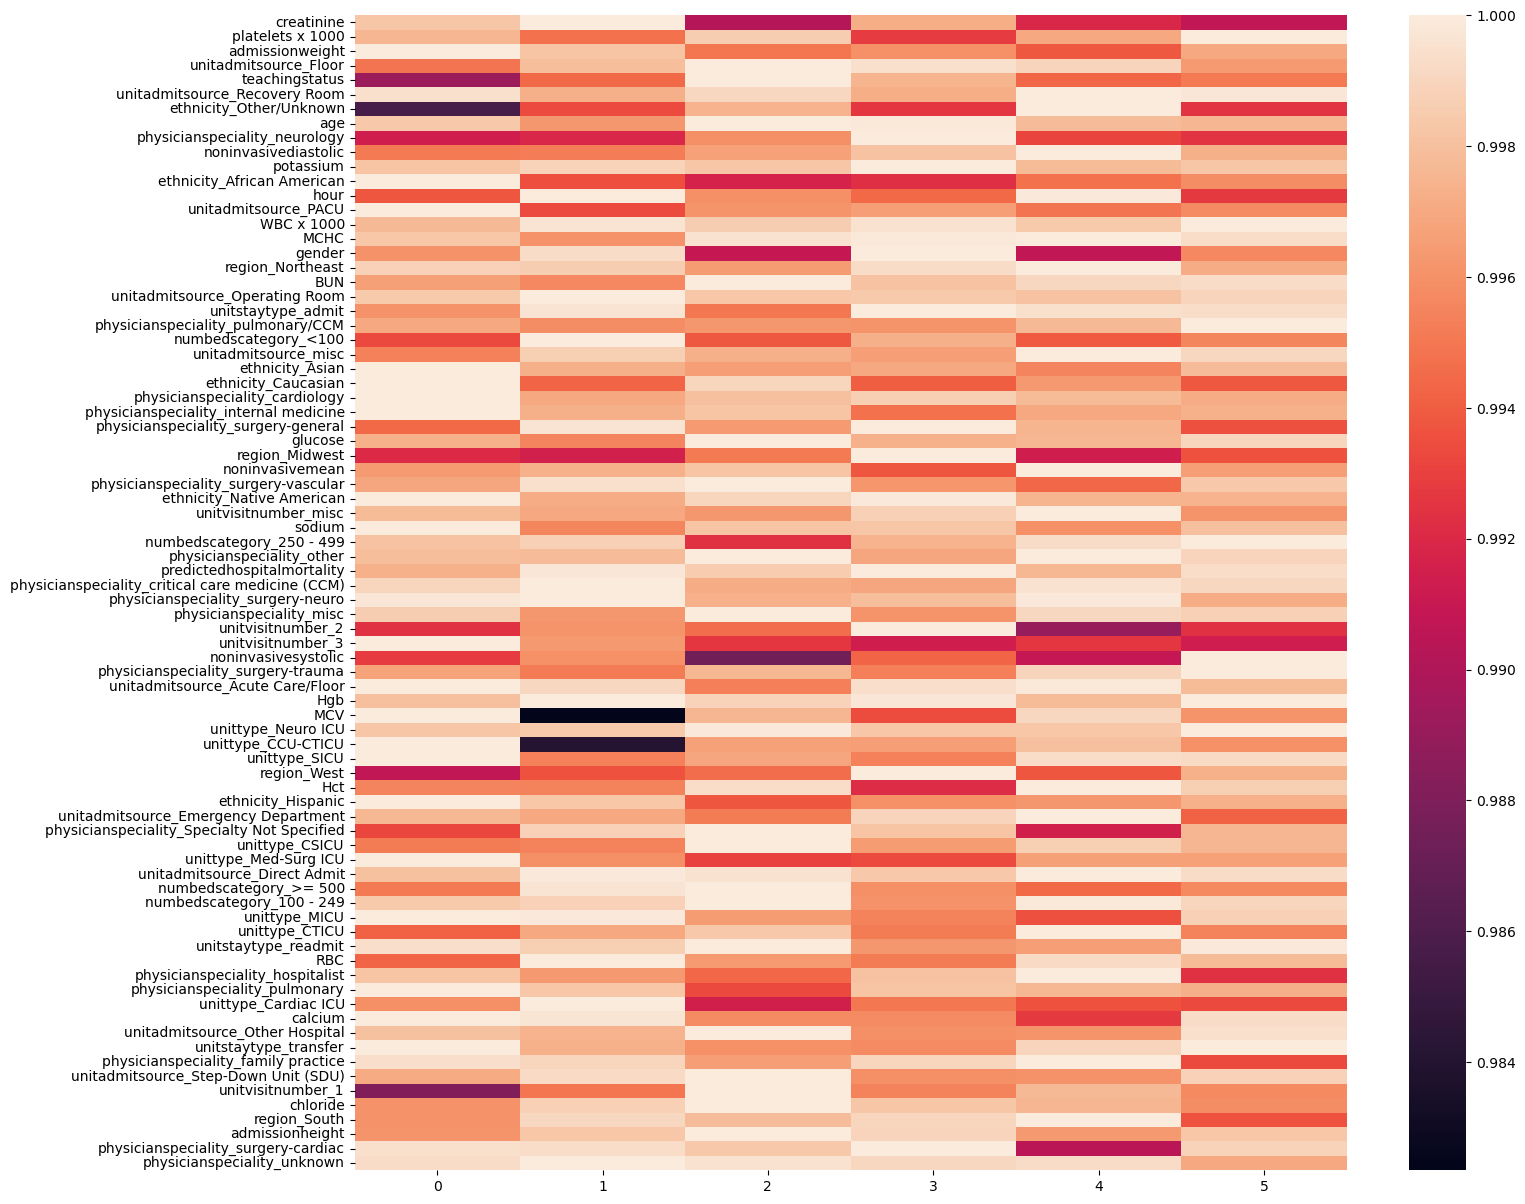

In [15]:
plt.figure(figsize = (16,15))
sns.heatmap(summary1.T, yticklabels=features)

<Axes: >

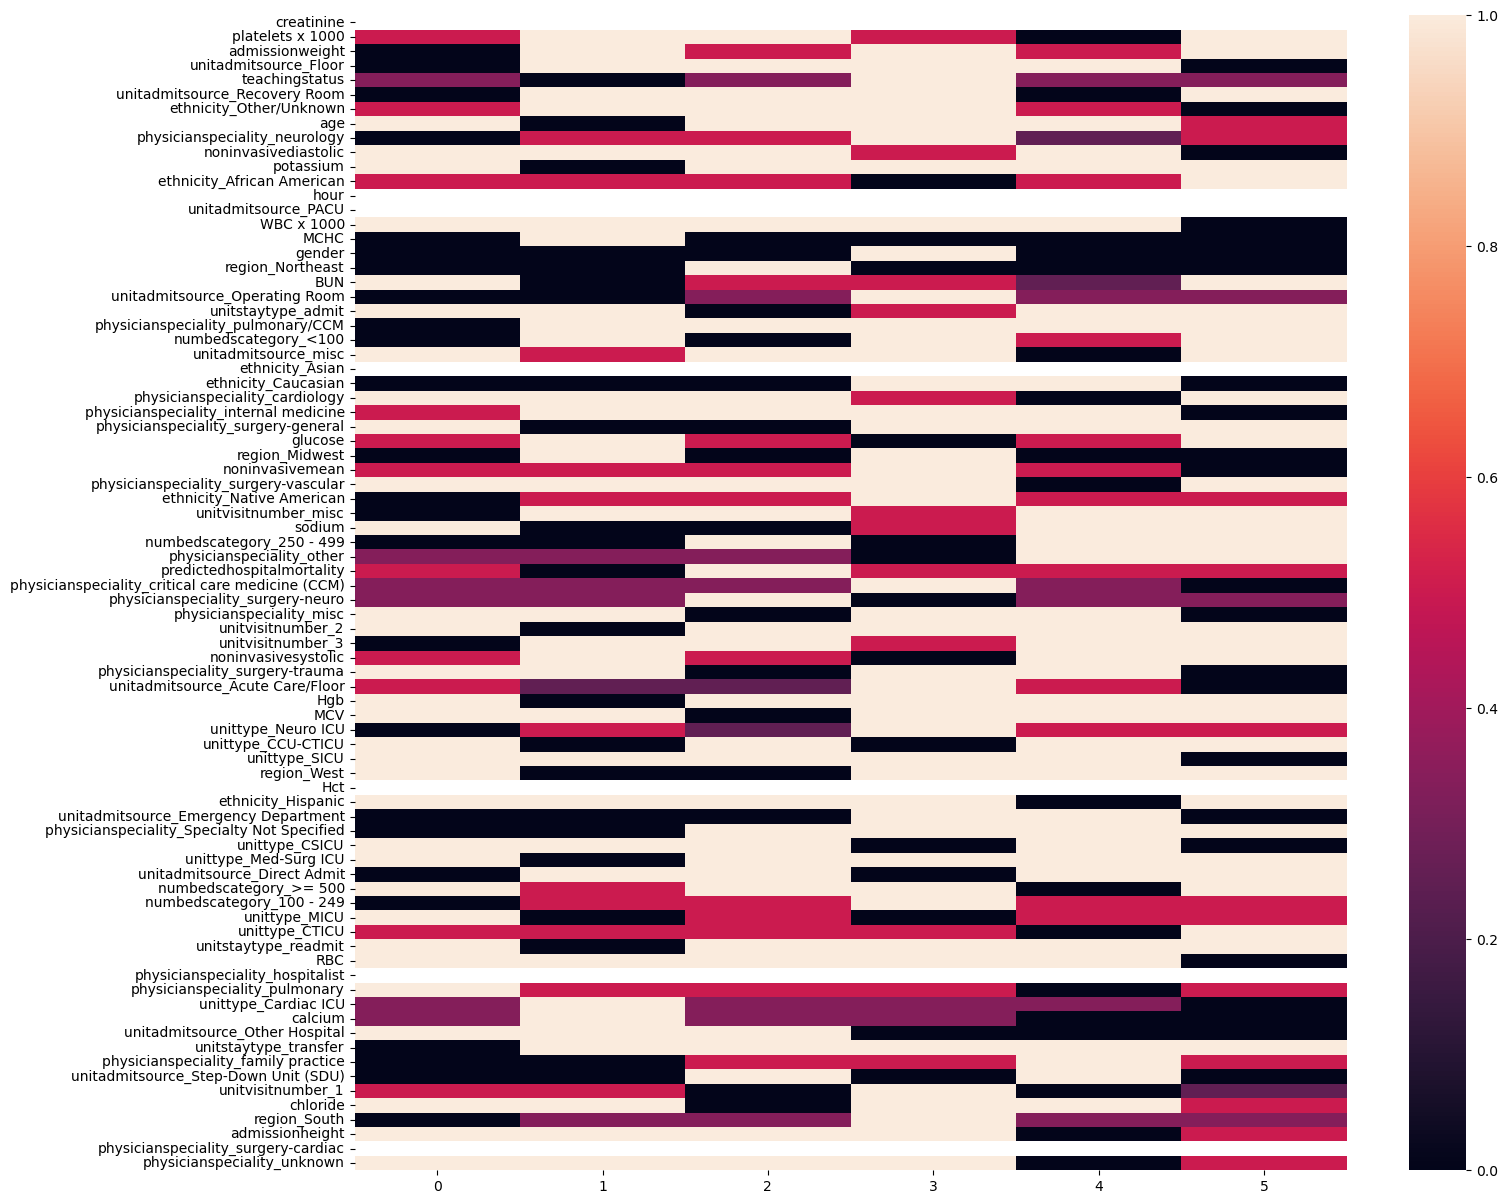

In [16]:
plt.figure(figsize = (16,15))
sns.heatmap(summary2.T, yticklabels=features)

In [54]:
summary = summary1 + summary2

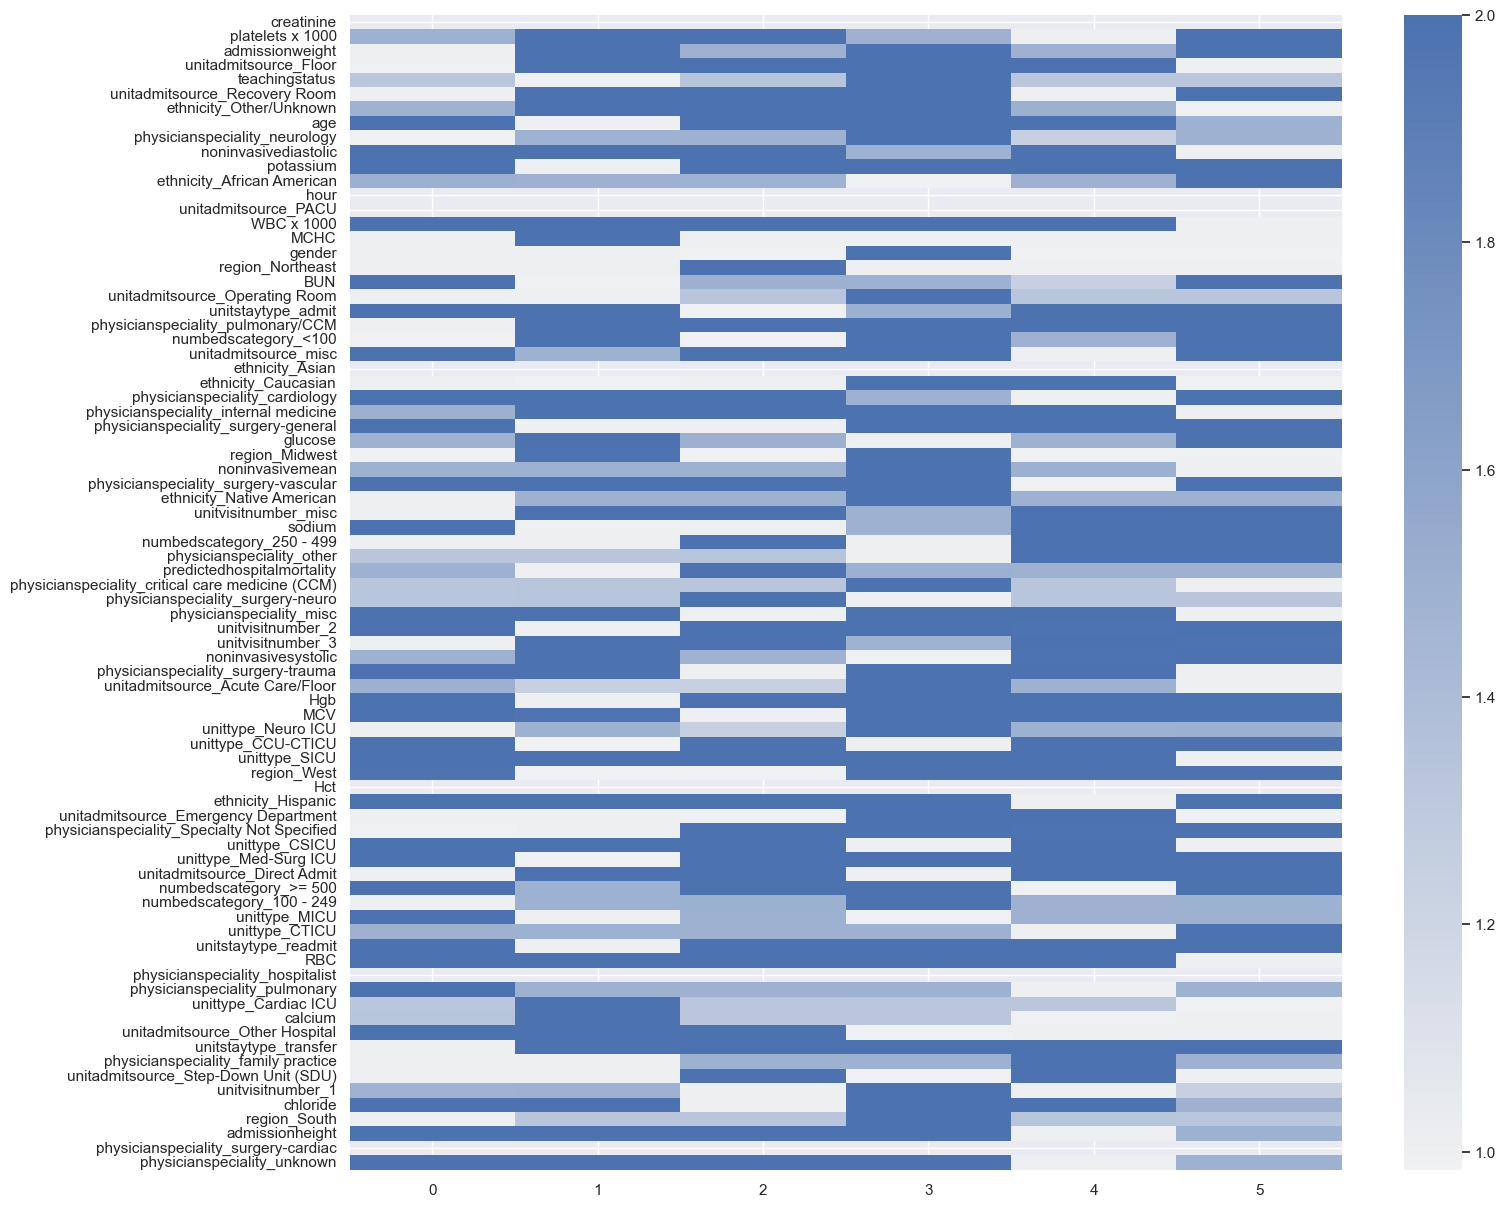

In [18]:
sns.set_palette("light:b")
sns.set()
from matplotlib.colors import ListedColormap
cmap = sns.color_palette("light:b", as_cmap=True)
plt.figure(figsize = (16,15))
sns.heatmap(summary.T, yticklabels=features, cmap=cmap)
plt.savefig('MIMICX_Explainability_Train.png', dpi=600)

In [55]:
test = np.load('attention_scores_test.npy')

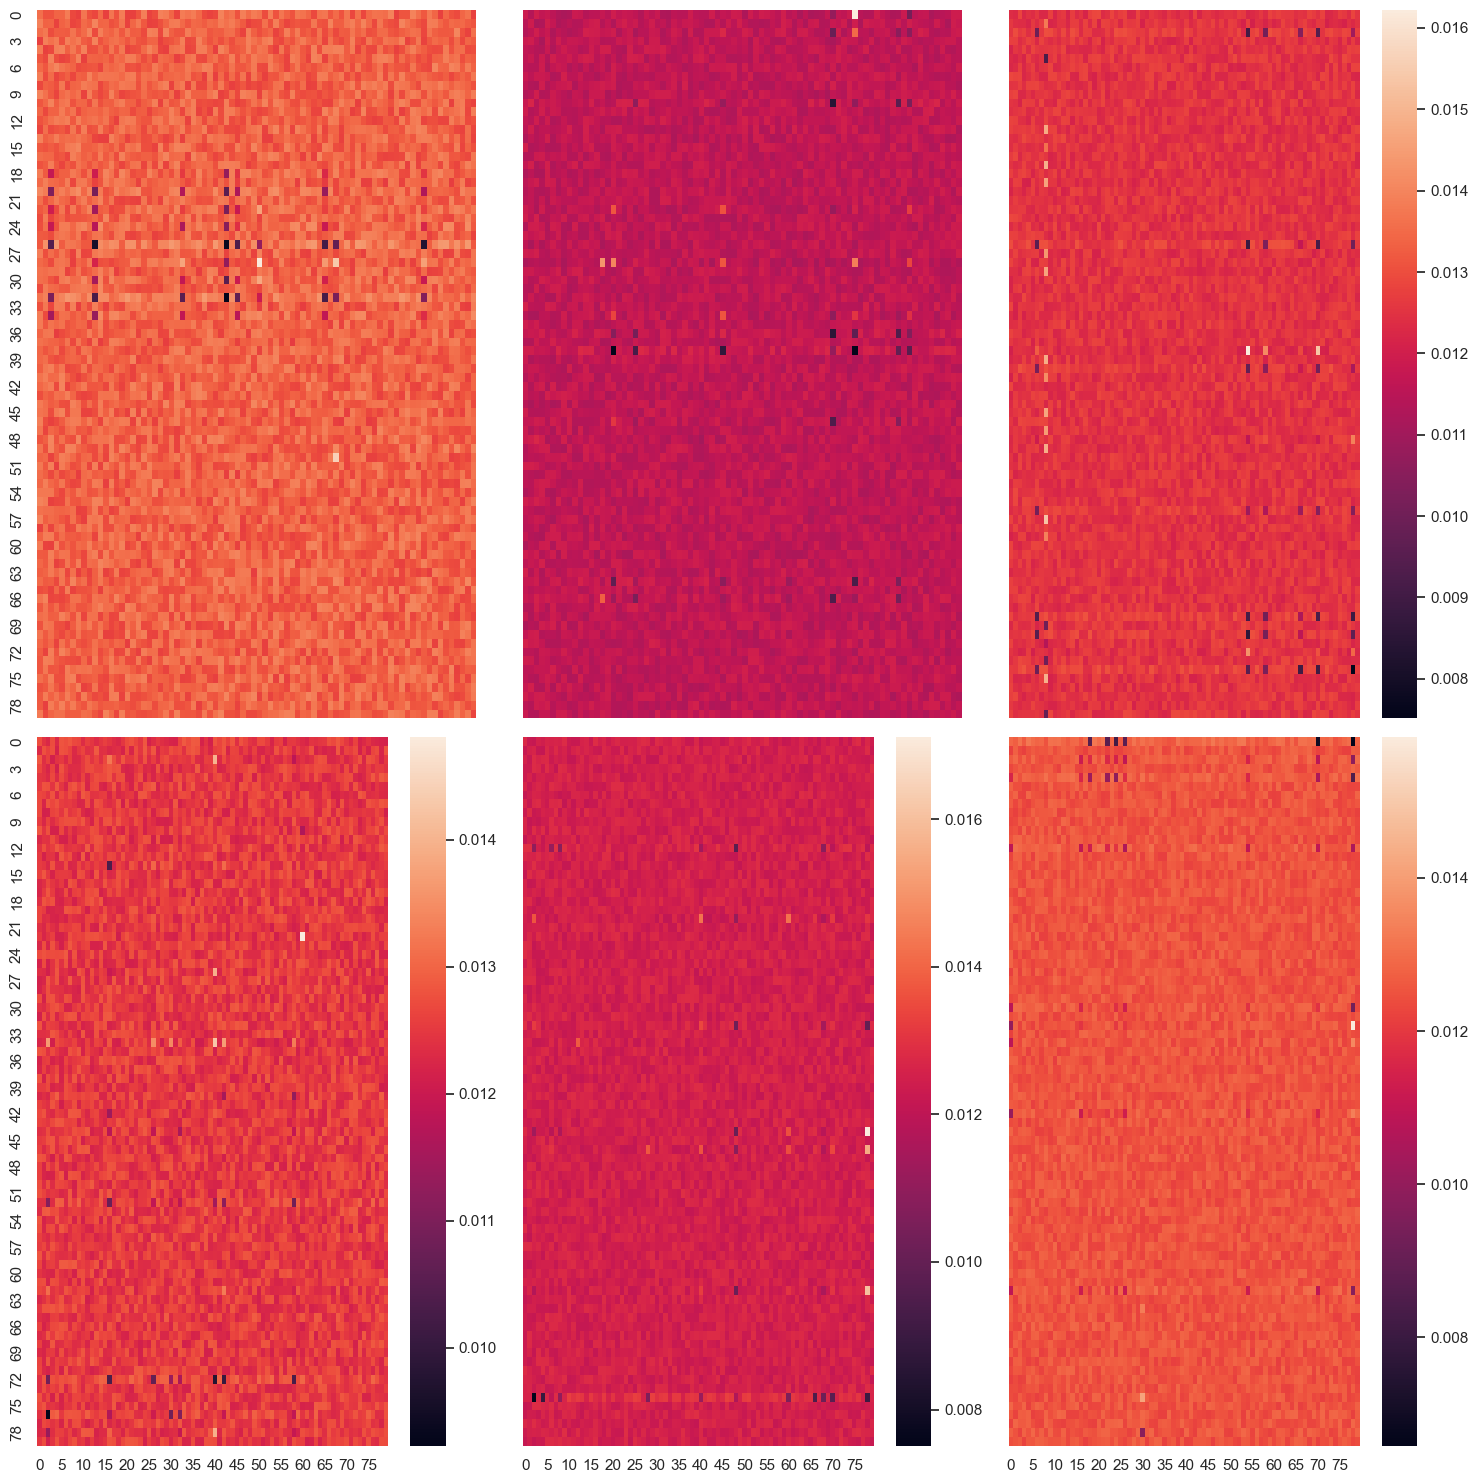

In [20]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(15, 15))
sns.heatmap(test[0, :, :], ax=axes[0, 0], cbar=False)
sns.heatmap(test[1, :, :], ax=axes[0, 1], cbar=False)
sns.heatmap(test[2, :, :], ax=axes[0, 2])
sns.heatmap(test[3, :, :], ax=axes[1, 0])
sns.heatmap(test[4, :, :], ax=axes[1, 1])
sns.heatmap(test[5, :, :], ax=axes[1, 2])
fig.tight_layout()
plt.savefig('Explainability_Test.png', dpi=600)

In [56]:
summary1 = np.sum(test, axis=1)
summary1 = summary1 / summary1.max(axis=0)

In [57]:
summary2 = np.sum(test, axis=2)
summary2 = (summary2 - summary2.min(0)) / summary2.ptp(0)

C:\Users\mmesinovic\AppData\Local\Temp\ipykernel_23992\1166452566.py:2: RuntimeWarning: invalid value encountered in divide
  summary2 = (summary2 - summary2.min(0)) / summary2.ptp(0)


<Axes: >

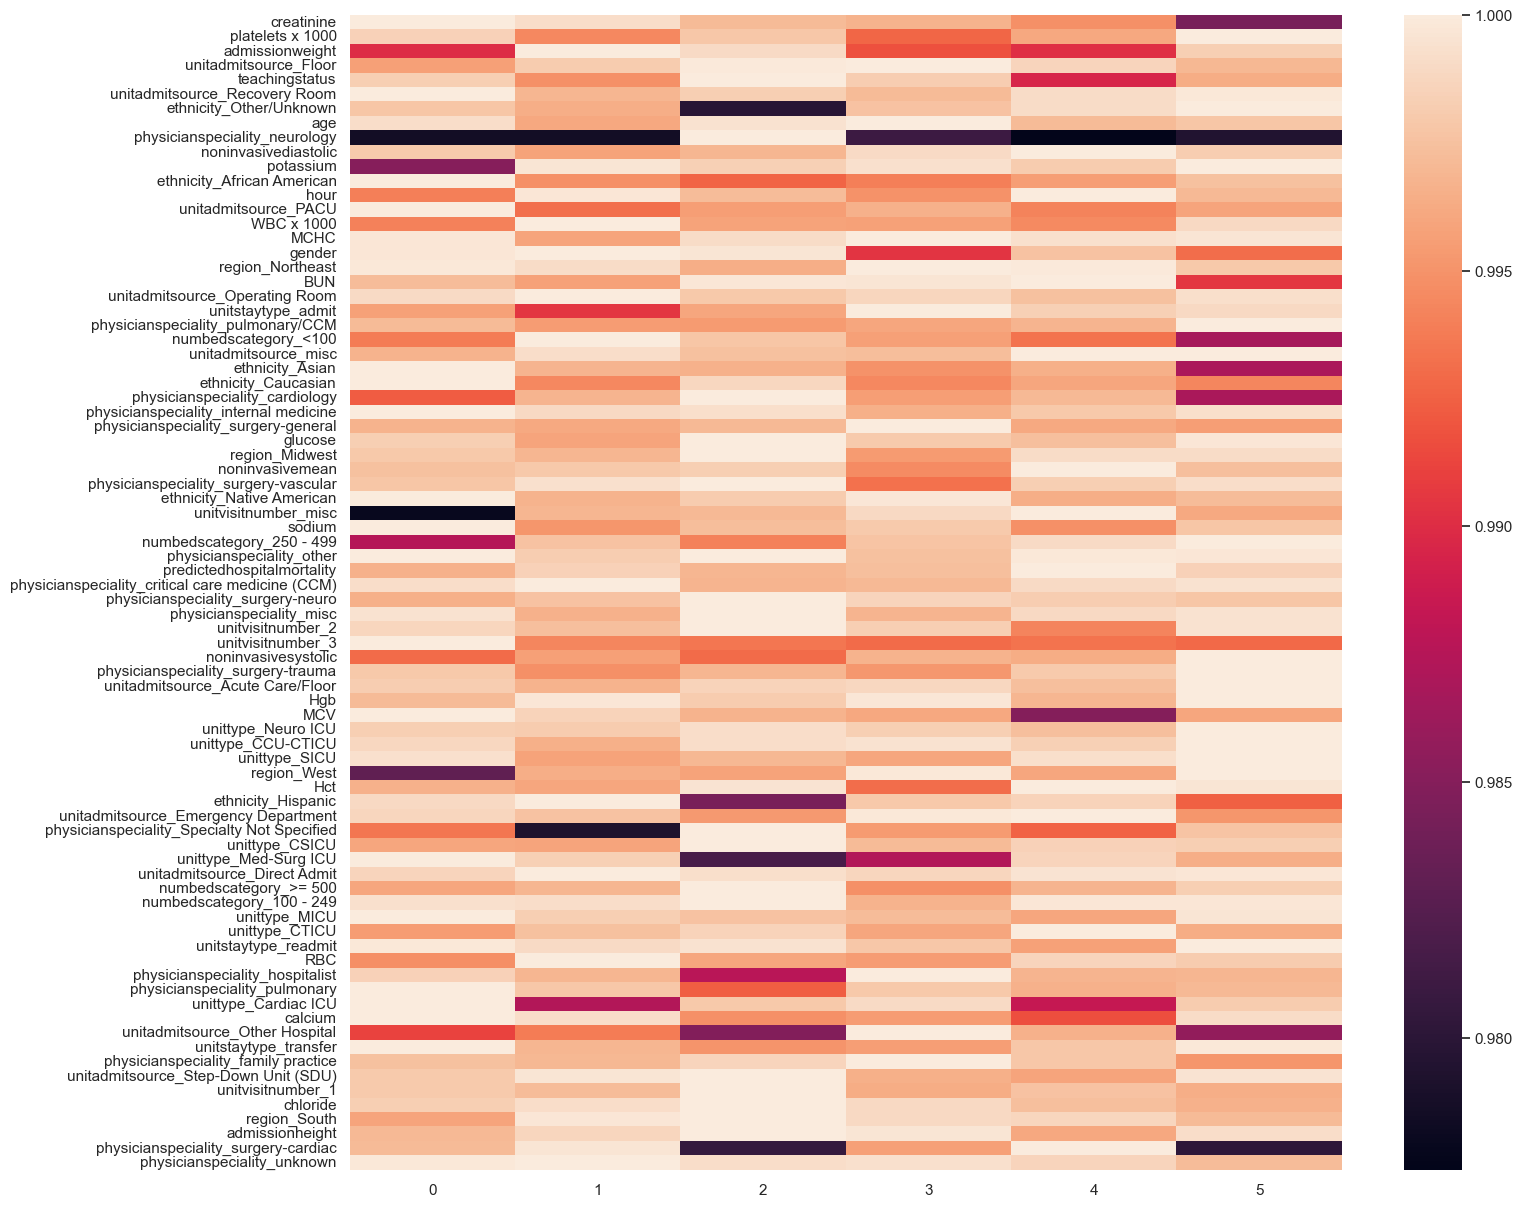

In [23]:
plt.figure(figsize = (16,15))
sns.heatmap(summary1.T, yticklabels=features)

<Axes: >

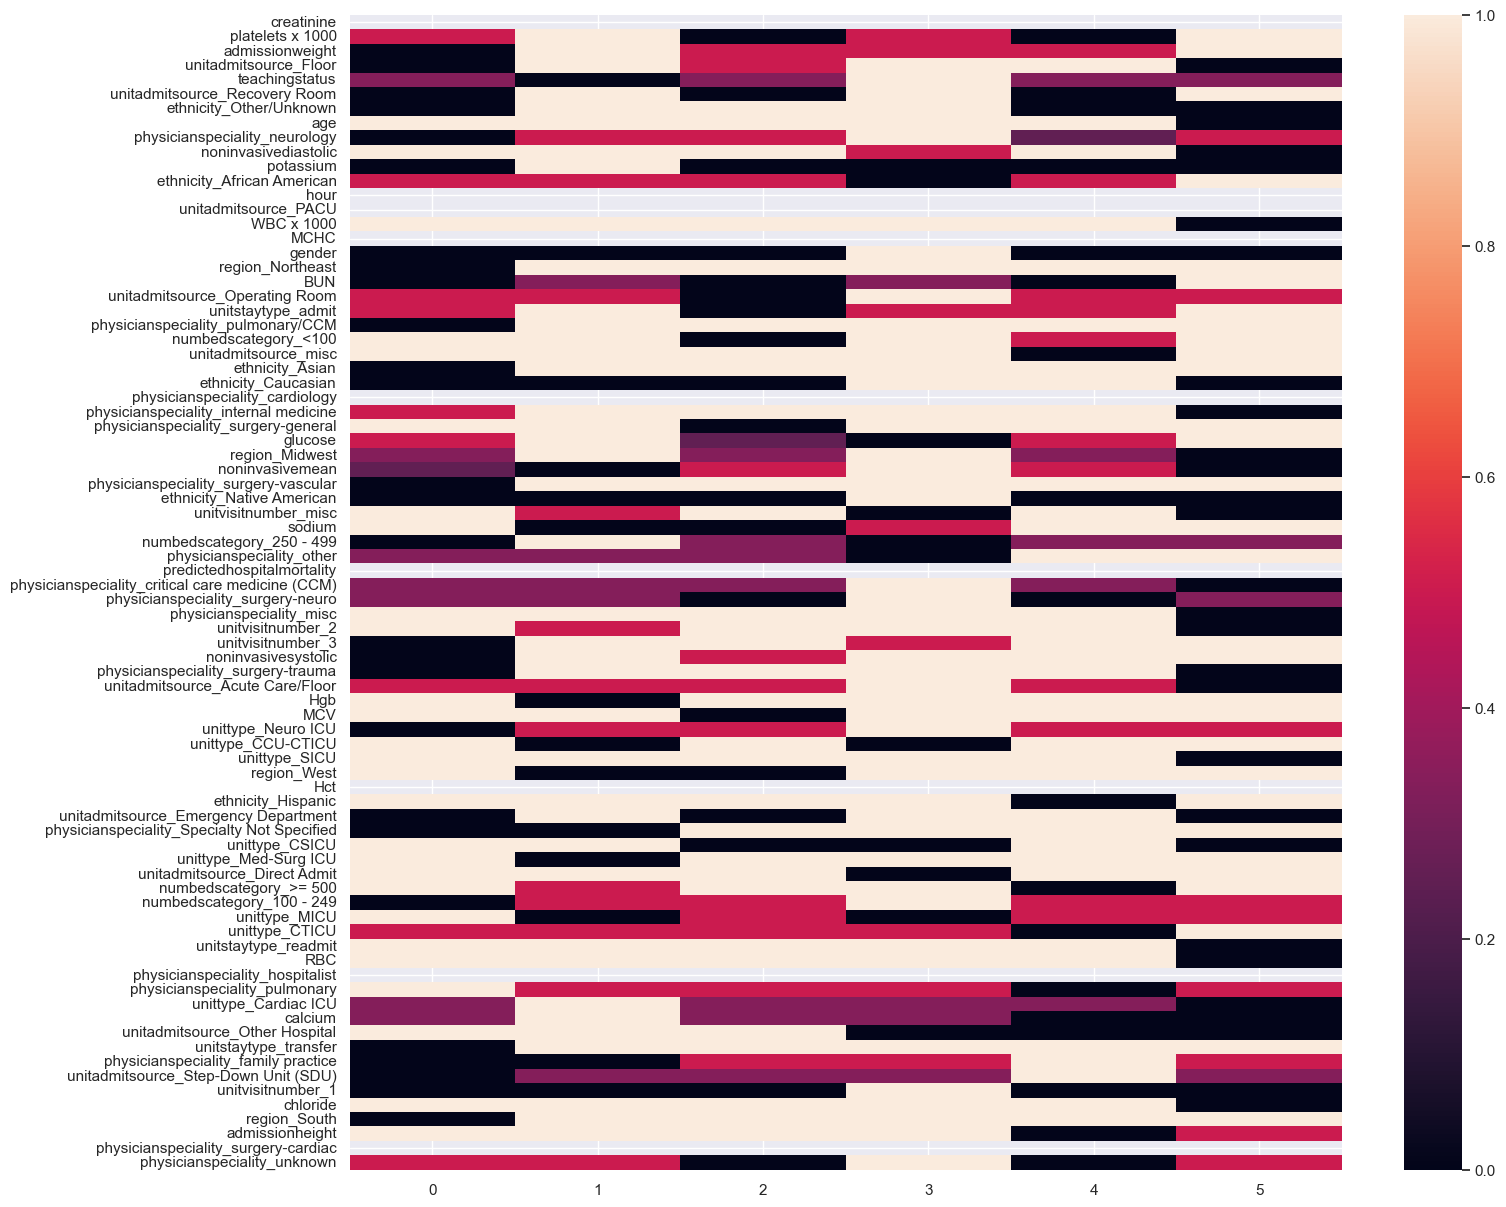

In [24]:
plt.figure(figsize = (16,15))
sns.heatmap(summary2.T, yticklabels=features)

In [58]:
summary = summary1 + summary2
summary = (summary - summary.min(0)) / summary.ptp(0)

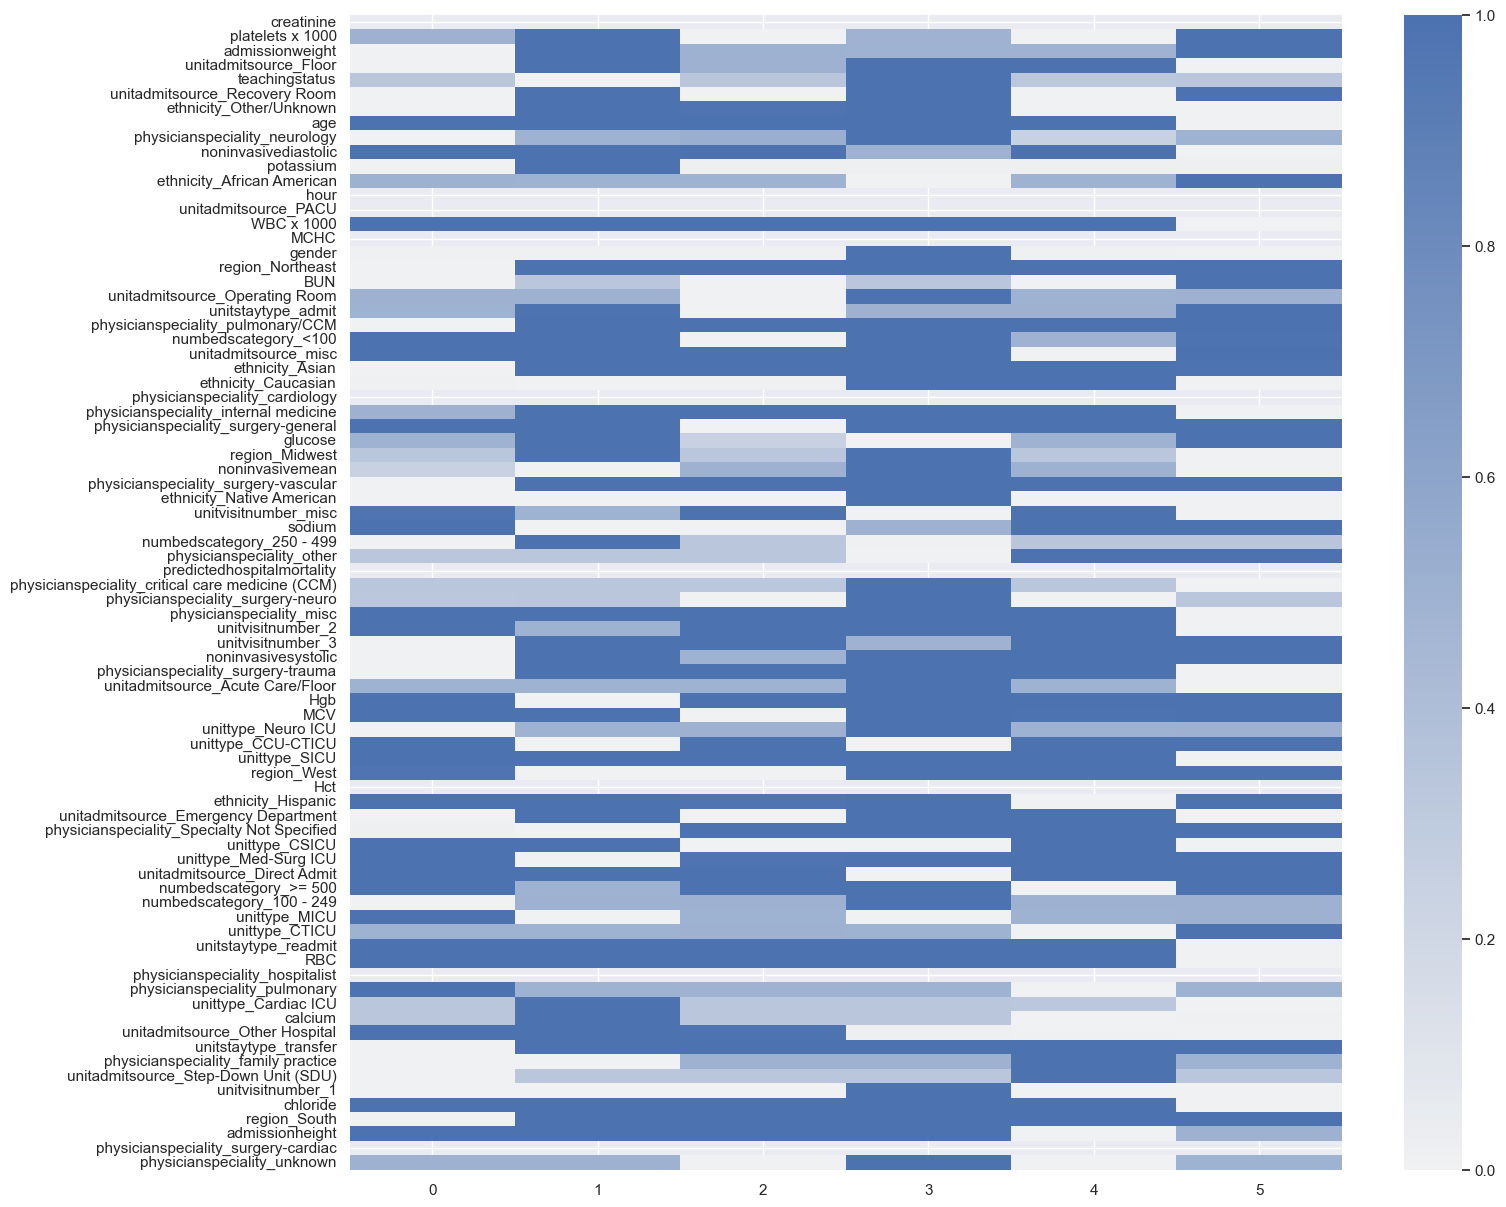

In [26]:
sns.set_palette("light:b")
sns.set()
cmap = sns.color_palette("light:b", as_cmap=True)
plt.figure(figsize = (16,15))
sns.heatmap(summary.T, yticklabels=features, cmap=cmap)
plt.savefig('Explainability_Test.png', dpi=600)

In [59]:
summary_top = summary[:, [2, 5, 8, 17, 18, 31, 37, 48, 61, 73]]

In [60]:
import operator
f = operator.itemgetter(2, 5, 8, 17, 18, 31, 37, 48, 61, 73)
features_top = ['WBC', 'Sex', 'Hct', 'Age', 'MCHC', 'SBP', 'Sodium', 'DBP', 'Calcium', 'Hgb']

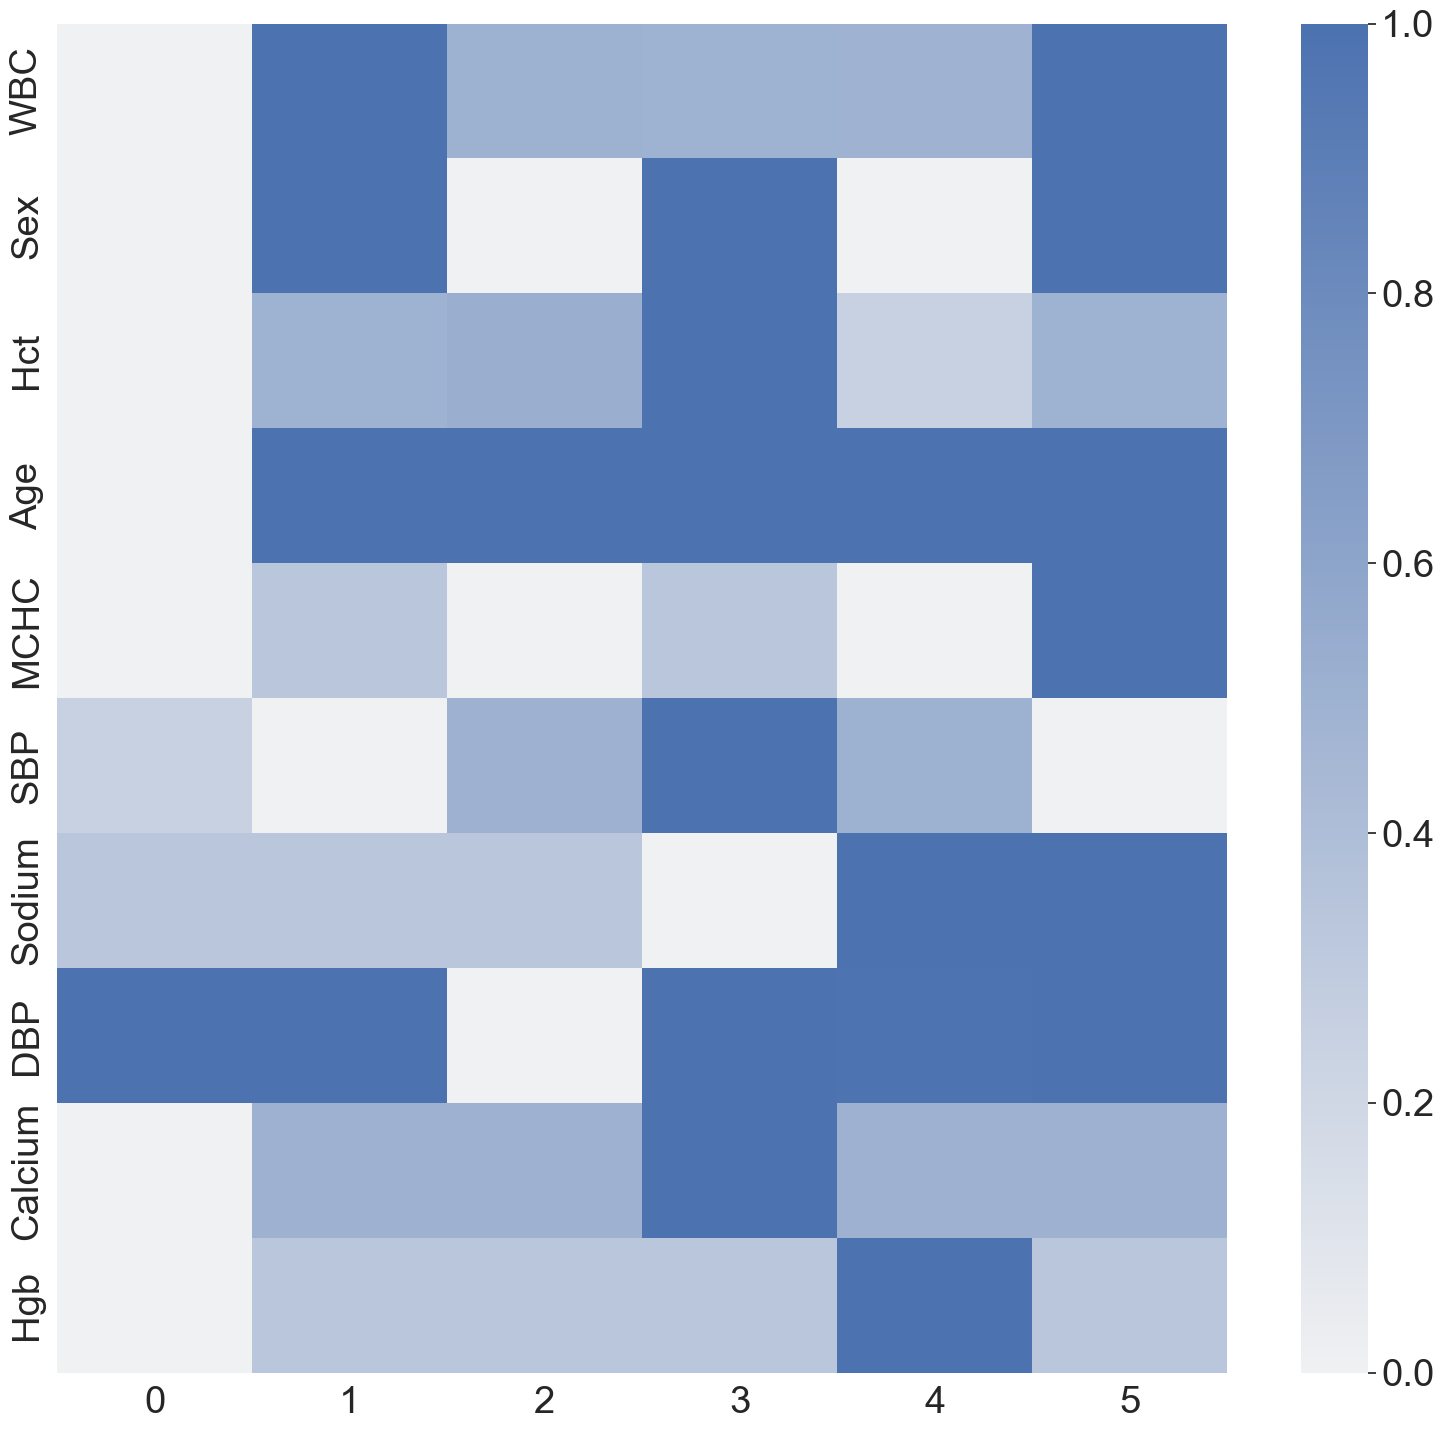

In [61]:
sns.set_theme(palette = "light:b", font_scale = 2.5, style='white')
cmap = sns.color_palette("light:b", as_cmap=True)
plt.figure(figsize = (16,15))
sns.heatmap(summary_top.T, yticklabels=features_top, cmap=cmap)
plt.tight_layout()
plt.savefig('Explainability_Test2.png', dpi=600)

In [30]:
features_top

['WBC', 'Sex', 'Hct', 'Age', 'MCHC', 'SBP', 'Sodium', 'DBP', 'Calcium', 'Hgb']

# MIMIC

In [31]:
test = np.load('attention_scores_test_MIMICX.npy')

In [32]:
test.shape

(6, 44, 44)

In [33]:
summary1 = np.sum(test, axis=1)
summary1 = summary1 / summary1.max(axis=0)

In [34]:
summary2 = np.sum(test, axis=2)
summary2 = (summary2 - summary2.min(0)) / summary2.ptp(0)

In [35]:
summary = summary1 + summary2
summary = (summary - summary.min(0)) / summary.ptp(0)

In [36]:
features = ['gender', 'age', 'anion gap',
       'white blood cell count', 'weight', 'temperature',
       'systolic blood pressure', 'sodium', 'respiratory rate',
       'red blood cell count', 'prothrombin time pt', 'prothrombin time inr',
       'potassium', 'platelets', 'phosphorous', 'phosphate',
       'partial thromboplastin time', 'oxygen saturation',
       'mean corpuscular hemoglobin concentration', 'magnesium', 'hemoglobin',
       'hematocrit', 'heart rate', 'glucose', 'diastolic blood pressure',
       'creatinine', 'chloride', 'calcium', 'blood urea nitrogen',
       'bicarbonate', 'vent', 'vaso', 'adenosine', 'dobutamine', 'dopamine',
       'epinephrine', 'isuprel', 'milrinone', 'norepinephrine',
       'phenylephrine', 'vasopressin', 'colloid_bolus', 'crystalloid_bolus',
       'nivdurations']

In [5]:
len(features)

44

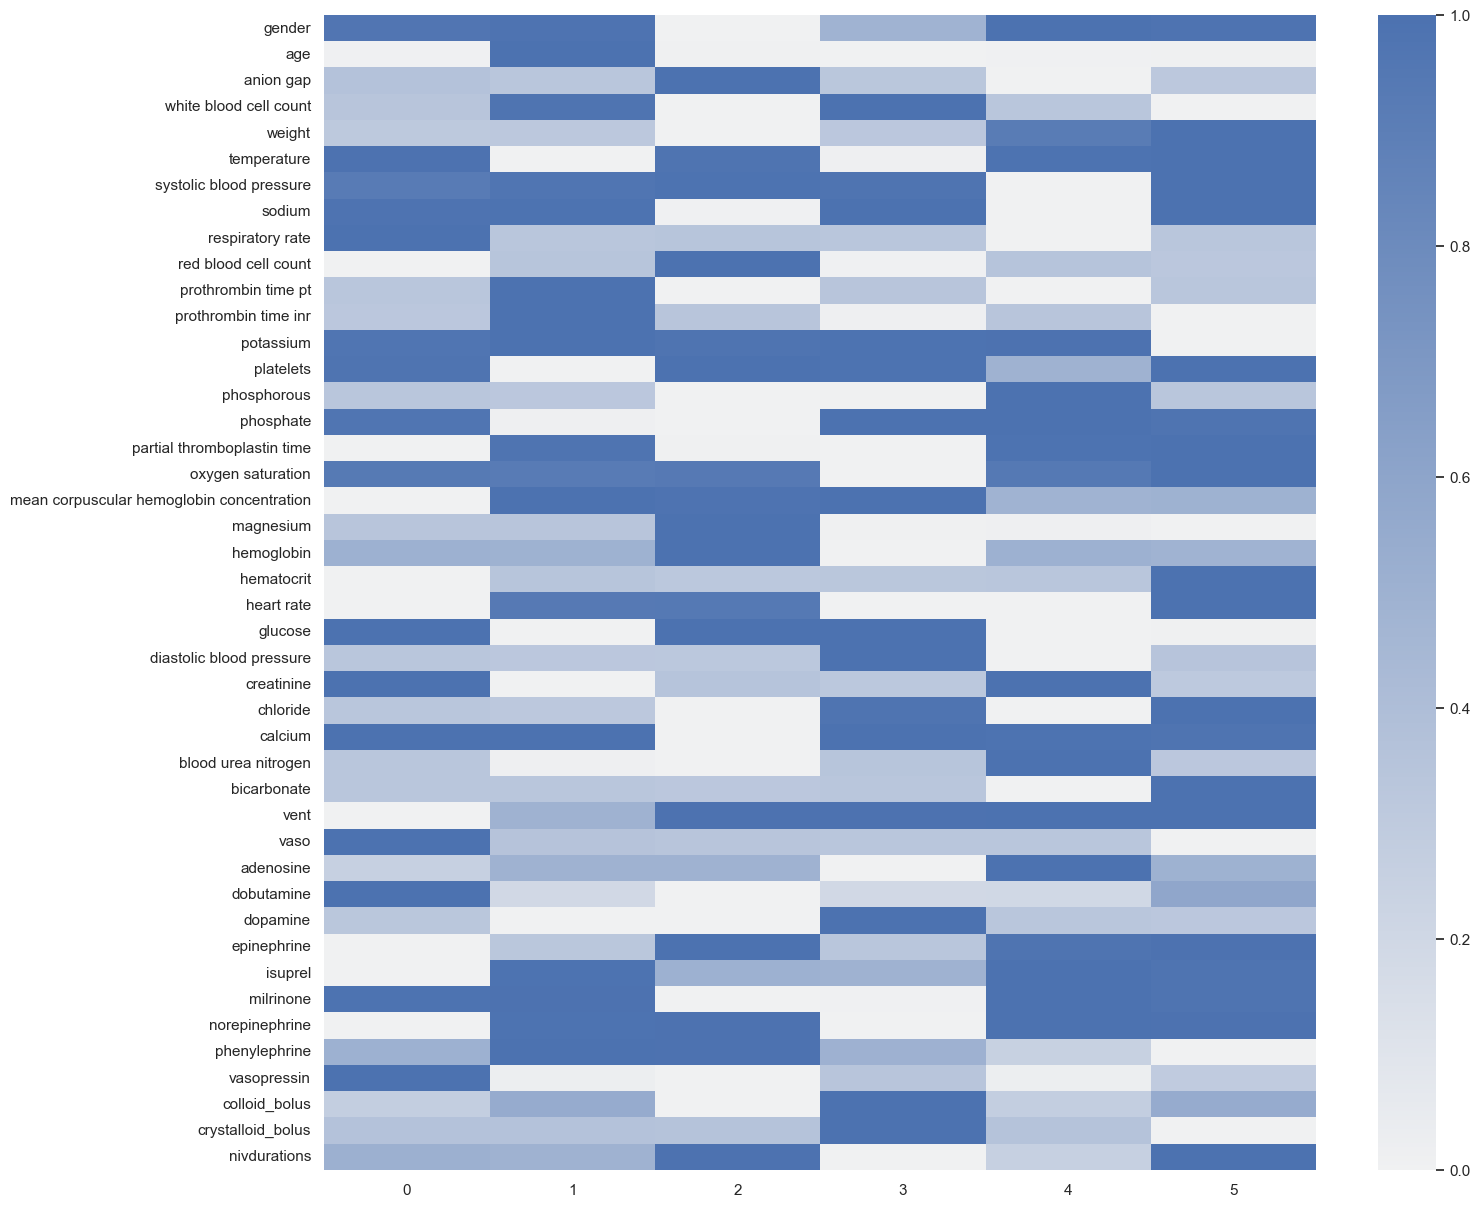

In [46]:
sns.set_palette("light:b")
sns.set()
cmap = sns.color_palette("light:b", as_cmap=True)
plt.figure(figsize = (16,15))
sns.heatmap(summary.T, yticklabels=features, cmap=cmap)
plt.savefig('Explainability_Test_MIMICX2.png', dpi=600)

In [37]:
summary_top = summary[:, [1, 0, 30, 17, 12, 13, 35, 27, 18, 6]]

In [38]:
features_top = ['Age', 'Sex', 'Vent', 'O2', 'Potassium', 'Platelets', 'Epinephrine', 'Calcium', 'Hgb', 'SBP']

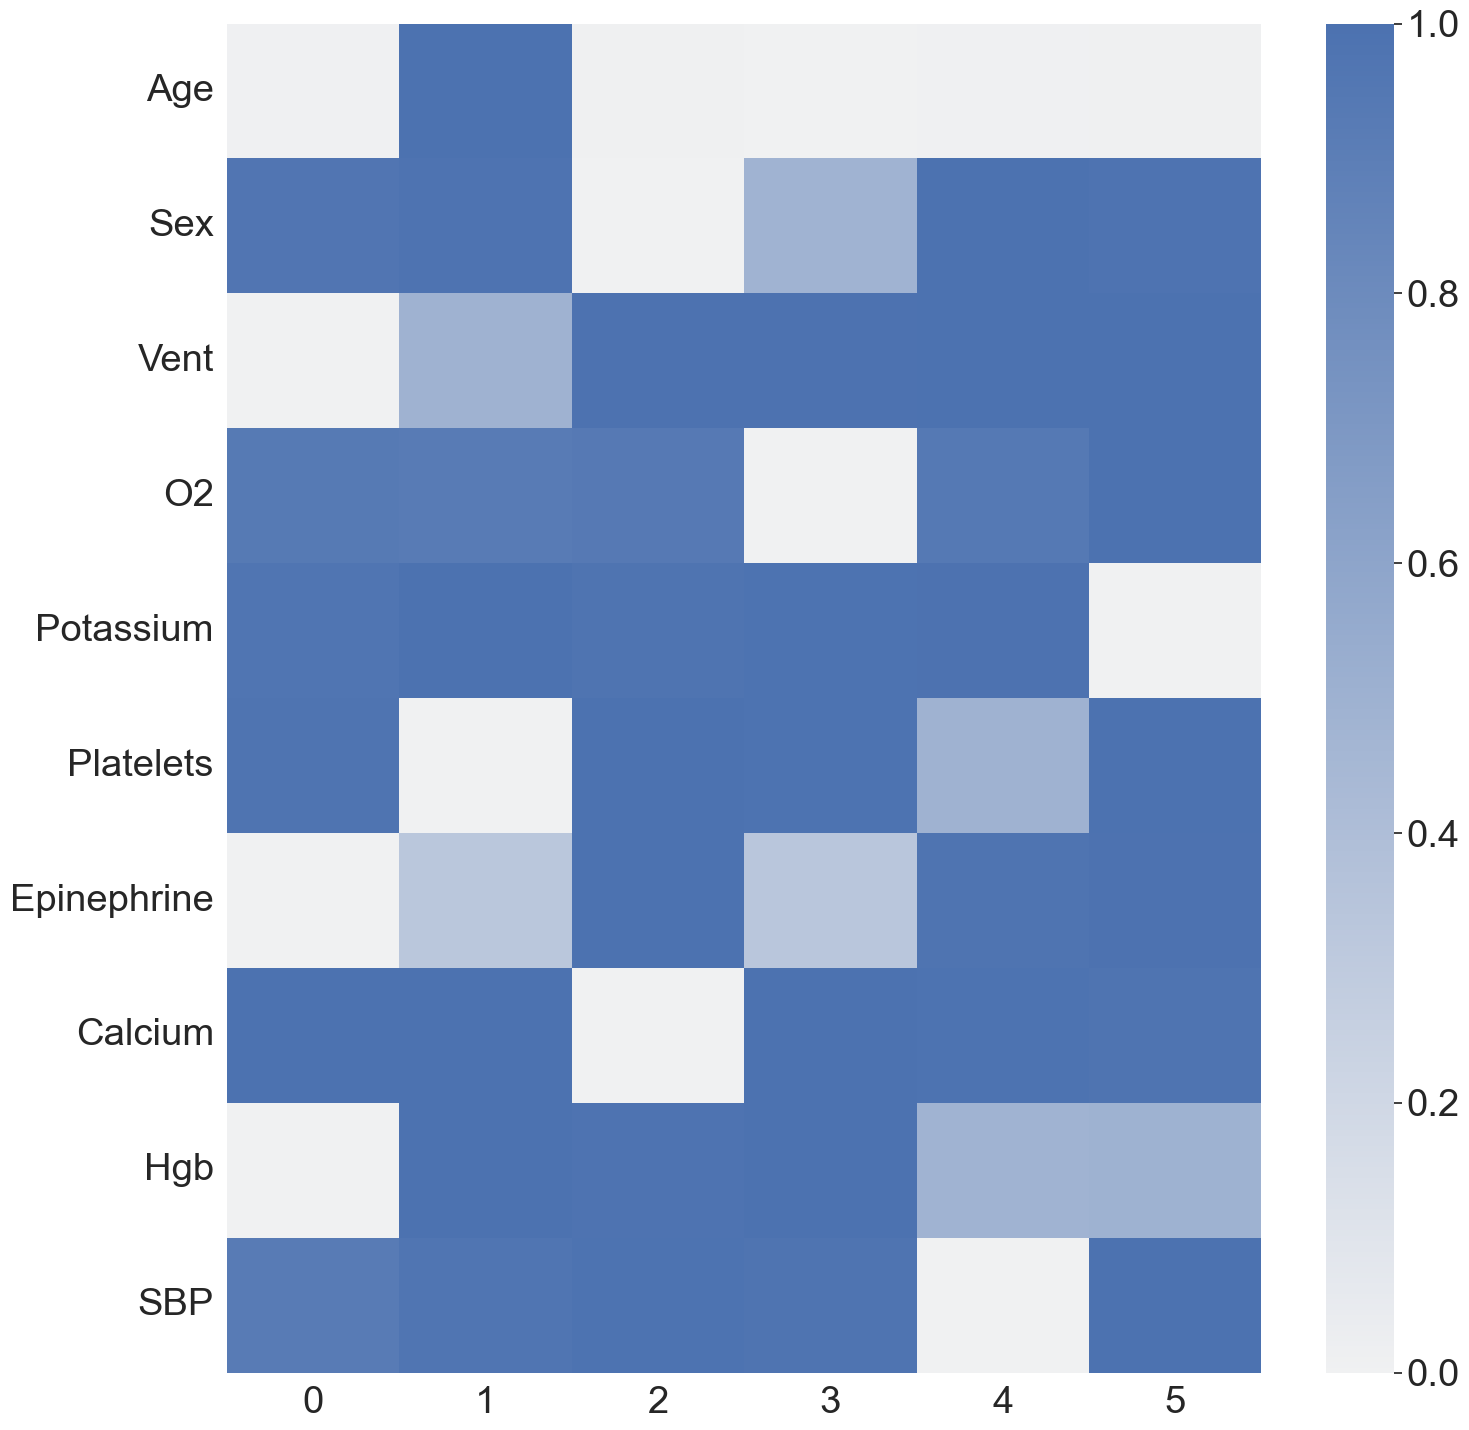

In [41]:
plt.figure(figsize = (16,15))
sns.heatmap(summary_top.T, yticklabels=features_top, cmap=cmap)
plt.tight_layout()
plt.savefig('Explainability_Test_MIMICX2.png', dpi=1000)

# HIRID

In [18]:
test = np.load('attention_scores_test_HIRID.npy')

In [19]:
test.shape

(6, 20, 20)

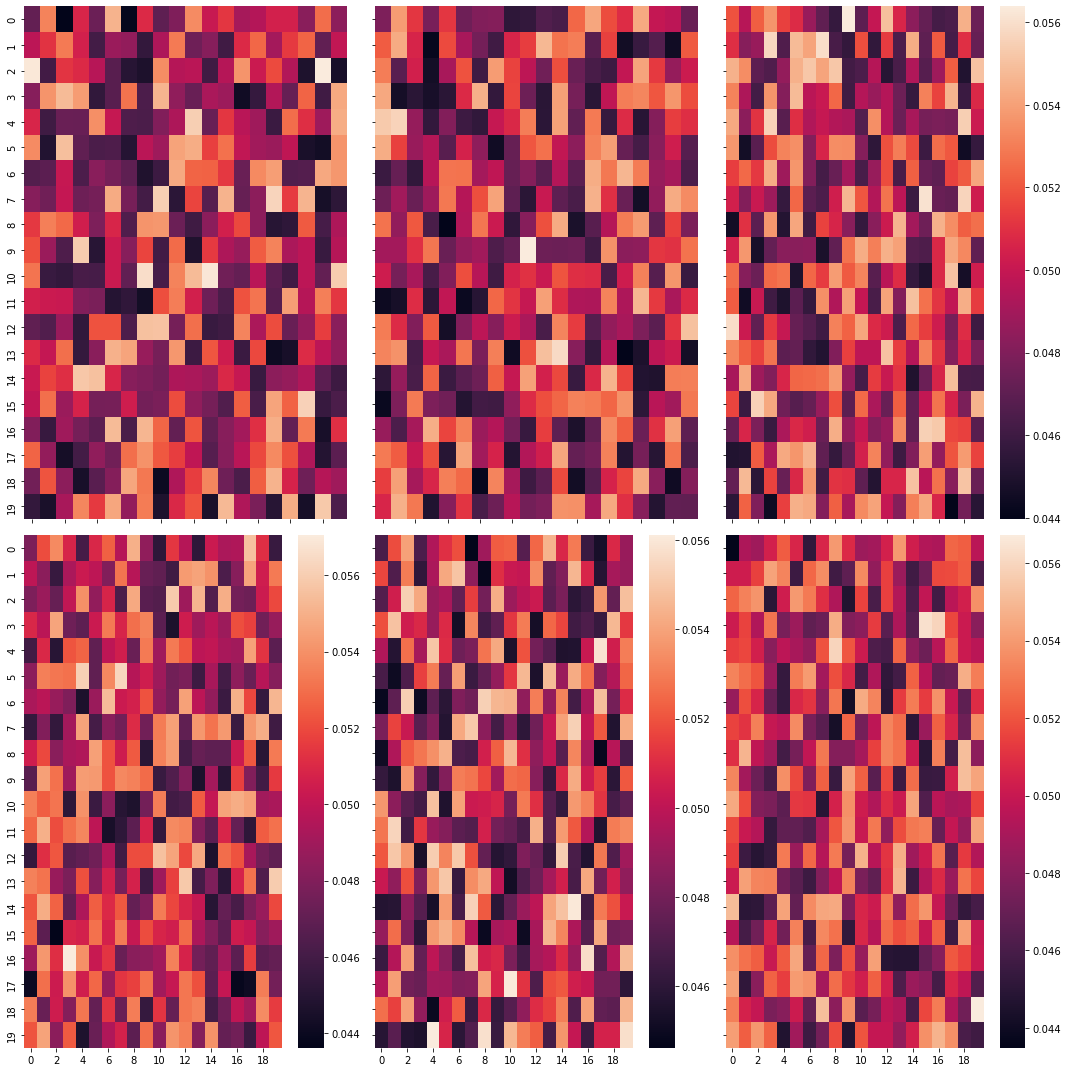

In [15]:
fig, axes = plt.subplots(2, 3, sharex=True, sharey=True, figsize=(15, 15))
sns.heatmap(train[0, :, :], ax=axes[0, 0], cbar=False)
sns.heatmap(train[1, :, :], ax=axes[0, 1], cbar=False)
sns.heatmap(train[2, :, :], ax=axes[0, 2])
sns.heatmap(train[3, :, :], ax=axes[1, 0])
sns.heatmap(train[4, :, :], ax=axes[1, 1])
sns.heatmap(train[5, :, :], ax=axes[1, 2])
fig.tight_layout()

In [16]:
features = ['sex', 'age', 'heart rate', 'ABP systolic', 'ABP diastolic', 'ABP mean', 'CO', 'SpO2', 'RASS', 'Ventilator peak pressure', 'Lactate (blood gas)',
                  'venous lactate', 'INR', 'Blood Glucose', 'C-reactive protein', 'Dobutamine', 'Milrinone', 'Levosimendan', 'Theophyllin', 'Other pain killers']

In [20]:
summary1 = np.sum(test, axis=1)
summary1 = summary1 / summary1.max(axis=0)

In [21]:
summary2 = np.sum(test, axis=2)
summary2 = (summary2 - summary2.min(0)) / summary2.ptp(0)

/var/folders/rb/zrr_wqjs59v2n19lg6kssgnw0000gr/T/ipykernel_2990/1166452566.py:2: RuntimeWarning: invalid value encountered in true_divide
  summary2 = (summary2 - summary2.min(0)) / summary2.ptp(0)


In [22]:
summary = summary1 + summary2
summary = (summary - summary.min(0)) / summary.ptp(0)

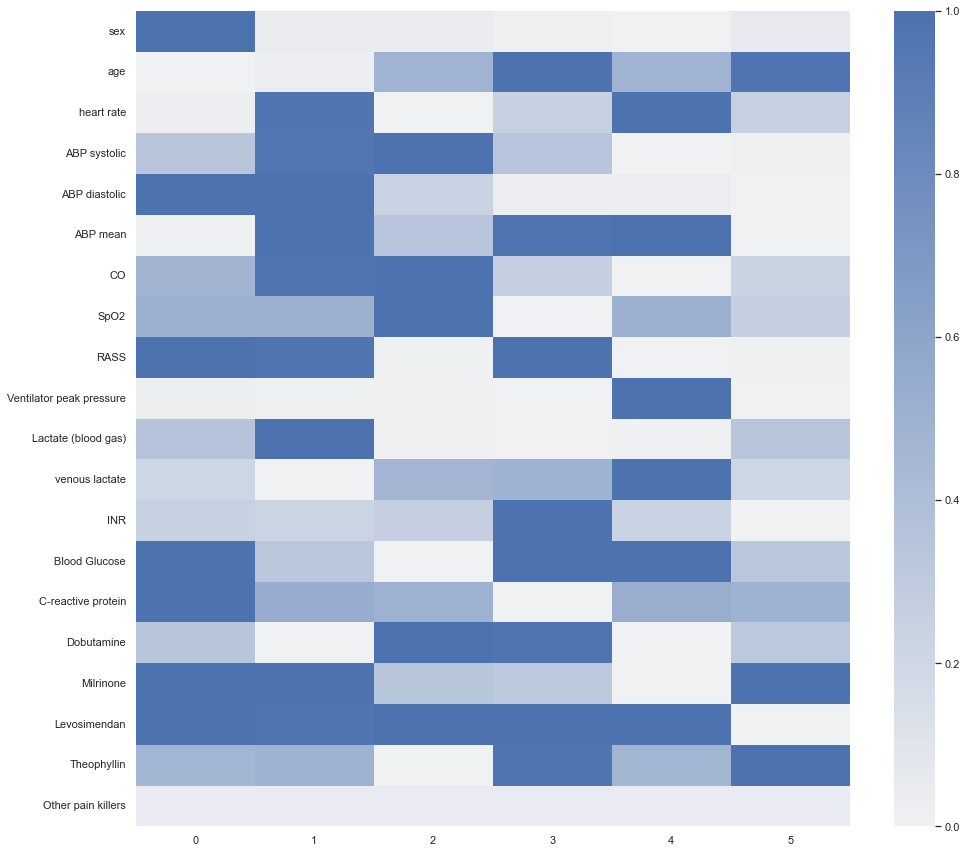

In [23]:
sns.set_palette("light:b")
sns.set()
cmap = sns.color_palette("light:b", as_cmap=True)
plt.figure(figsize = (16,15))
sns.heatmap(summary.T, yticklabels=features, cmap=cmap)
plt.savefig('Explainability_Test_HIRID.png', dpi=600)

In [25]:
summary_top = summary[:, [0, 1, 3, 4, 6, 7, 11, 12, 13, 14]]

In [26]:
features_top = ['Sex', 'Age', 'SBP', 'DBP', 'CO', 'SpO2', 'Lactate', 'INR', 'Glucose', 'C-RP']

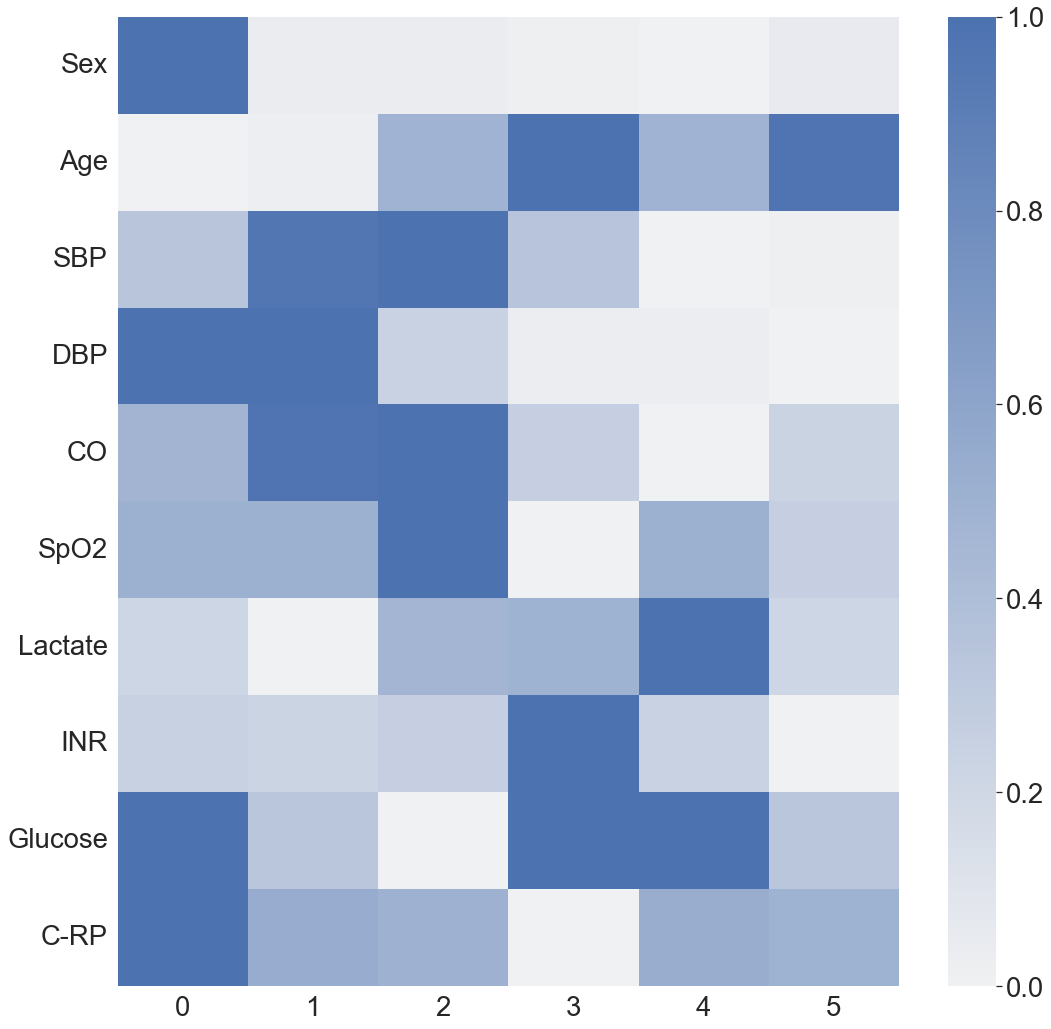

In [29]:
sns.set_theme(palette = "light:b", font_scale = 2.5, style='white')
cmap = sns.color_palette("light:b", as_cmap=True)

plt.figure(figsize = (16,15))
sns.heatmap(summary_top.T, yticklabels=features_top, cmap=cmap)
plt.tight_layout()
plt.savefig('Explainability_Test_HIRID.png', dpi=1000)